In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [2]:
np.random.seed(1000)

In [3]:
A = np.random.randn(1000,10)

In [4]:
A.shape

(1000, 10)

In [5]:
x_bar = []
for i in range(1,11):
  if i % 2 == 0 :
    x_bar.append(np.random.uniform(i,i+1))
  else:
    x_bar.append(np.random.uniform(-i-1,-i))
x_bar = np.array(x_bar).reshape(10,1)
x_bar.shape

(10, 1)

In [6]:
e = np.random.randn(1000,1)
e.shape

(1000, 1)

In [7]:
y = np.matmul(A,x_bar) + e
y.shape

(1000, 1)

1. Write Python functions using appropriate numpy routines to compute the objective function value, the gradient
value and the Hessian of f.

In [8]:
def evalf(x):
  assert type(x) is np.ndarray and len(x) == 10
  return 0.5 * (np.linalg.norm(np.matmul(A,x)-y))**2

In [9]:
def evalg(x):
  arr = np.zeros(10)
  err = np.subtract(np.matmul(A,x),y)
  for i in range(10):
    arr[i] = np.matmul(err.transpose(),A[:,i])
  return arr.reshape(10,1)

In [10]:
def evalh(x):
  hessian = np.zeros((10,10))
  for i in range(10):
    for j in range(10):
      hessian[i][j] = np.matmul(A[:,i],A[:,j])
  return hessian

##Q2

In [11]:
def compute_steplength_backtracking_scaled_direction(x, p, gradf, alpha_start, rho, gamma, d_k):
  
  alpha = alpha_start

  while evalf(x+alpha*np.matmul(d_k,p)) > evalf(x) + gamma*alpha*(np.matmul(gradf.transpose(),np.matmul(d_k,p))):
    alpha = rho*alpha

  return alpha

In [12]:
def Newton(n, tol, *args):
  xlist = []
  x = np.zeros(n).reshape(n,1)
  xlist.append(x)
  grad_f = evalg(x)

  alpha = args[0]
  rho = args[1]
  gamma = args[2]

  hes_f = evalh(x)

  k = 0

  while np.linalg.norm(grad_f) > tol and k < 10000:
    p = -grad_f
    d = np.linalg.inv(hes_f)
    step_length = compute_steplength_backtracking_scaled_direction(x, p, grad_f, alpha, rho, gamma, d)
    x = np.add(x, np.multiply(step_length, np.matmul(d,p)))
    xlist.append(x)
    k += 1 
    grad_f = evalg(x) 
    hes_f = evalh(x)
  return k, x, evalf(x), xlist

In [13]:
n = 10 
tol = 1e-4
alpha_start = 0.99
rho = 0.5
gamma = 0.5
start_time = timer()
k, x, f, l = Newton(n, tol, alpha_start, rho, gamma)
end_time = timer()
n_time = end_time - start_time
print("Using Newtons Method")
print("No of iterations taken :",k)
print("Minimizer: ",x)
print("Minimum value at Minimizer :",f)
print("Time taken to complete :",n_time)

Using Newtons Method
No of iterations taken : 5
Minimizer:  [[-1.04982253]
 [ 2.95189743]
 [-3.34298192]
 [ 4.60956007]
 [-5.71176195]
 [ 6.89877618]
 [-7.62879358]
 [ 8.16821112]
 [-9.22221199]
 [10.05669293]]
Minimum value at Minimizer : 505.647329524551
Time taken to complete : 0.007817982000233314


In [14]:
for i in range(6) :
  print( f" X_{i} : ",l[i].T)

 X_0 :  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
 X_1 :  [[-1.03932431  2.92237846 -3.3095521   4.56346447 -5.65464433  6.82978842
  -7.55250565  8.086529   -9.12998987  9.956126  ]]
 X_2 :  [[-1.04971755  2.95160224 -3.34264762  4.60909912 -5.71119077  6.8980863
  -7.6280307   8.16739429 -9.22128977 10.05568726]]
 X_3 :  [[-1.04982148  2.95189448 -3.34297858  4.60955546 -5.71175624  6.89876928
  -7.62878595  8.16820295 -9.22220277 10.05668287]]
 X_4 :  [[-1.04982252  2.9518974  -3.34298189  4.60956003 -5.71176189  6.89877611
  -7.62879351  8.16821103 -9.2222119  10.05669283]]
 X_5 :  [[-1.04982253  2.95189743 -3.34298192  4.60956007 -5.71176195  6.89877618
  -7.62879358  8.16821112 -9.22221199 10.05669293]]


In [15]:
x_min = x

<ipython-input-16-439dd65ebec6>:3: RuntimeWarning: divide by zero encountered in log10
  pl.append(np.log10(np.linalg.norm(np.subtract(l[i],x_min))))


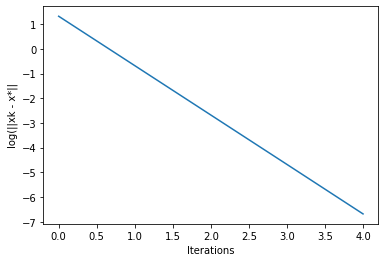

In [16]:
pl = []
for i in range(k+1):
  pl.append(np.log10(np.linalg.norm(np.subtract(l[i],x_min))))

kl = range(0,k+1)

plt.plot(kl,pl)
plt.xlabel('Iterations')
plt.ylabel('log(||xk - x*||')
plt.show();

<ipython-input-17-22c173be859b>:3: RuntimeWarning: divide by zero encountered in log10
  fl.append(np.log10(abs(evalf(l[i])-f)))


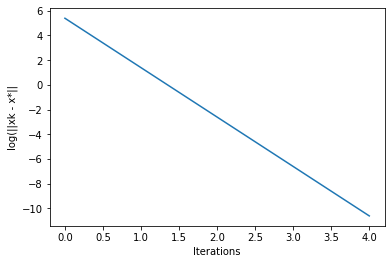

In [17]:
fl = []
for i in range(k+1):
  fl.append(np.log10(abs(evalf(l[i])-f)))

kl = range(0,k+1)

plt.plot(kl,fl)
plt.xlabel('Iterations')
plt.ylabel('log(||xk - x*||')
plt.show();

In [18]:
# checking for convergence 
c = []
for i in range(4):
  c.append(np.linalg.norm(l[i+1]-x_min)/np.linalg.norm(l[i]-x_min))
print(c)
c = []
for i in range(4):
  c.append(np.linalg.norm(np.subtract(evalf(l[i+1]),evalf(x_min)))/np.linalg.norm(np.subtract(evalf(l[i]),evalf(x_min))))
print(c)

[0.009999999901000178, 0.009999990099996182, 0.009999009998883241, 0.009900990023966934]
[0.00010000000000000419, 0.0001000000000006699, 0.00010000008792552914, 9.928904855746034e-05]


Looking at the definitions of convergence of sequences . 
* We can see for x values the difference can be bounded by value between 0 to 1 so the type of convergence here is Q-Linear and r is 0.999999999999999999999
* we can see for function values at x the differnce was reaching to zero so we can bound the value for some r between 0 to 1 so the type of convergence is Q - Linear

###Q3

In [19]:
def compute_steplength_backtracking(x, gradf, B, alpha_start, rho, gamma):
  
  alpha = alpha_start

  while evalf(x+alpha*-np.matmul(B,gradf)) > evalf(x) + gamma*alpha*np.matmul(gradf.transpose(),-np.matmul(B,gradf)):
    alpha = rho*alpha

  return alpha

In [20]:
def BFGS(n, tol, *args):
  xlist = []
  x1 = np.zeros(n).reshape(n,1)
  xlist.append(x1)
  grad_f = evalg(x1)

  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]

  I = np.identity(n)

  B = I

  k = 0

  while np.linalg.norm(grad_f) > tol and k < 3000:
    alpha = compute_steplength_backtracking(x1, grad_f, B, alpha_start, rho, gamma)
    x2 = np.add(x1, np.multiply(alpha,np.matmul(B,-grad_f)))
    s = x2 - x1
    y = evalg(x2) - evalg(x1)
    mu = 1/np.matmul(y.transpose(),s)
    B = np.add(np.matmul(np.matmul(np.subtract(I,np.matmul(np.multiply(mu,s),y.transpose())),B),np.subtract(I,np.matmul(np.multiply(mu,y),s.transpose()))),np.matmul(np.multiply(mu,s),s.transpose()))
    x1 = x2
    xlist.append(x1)
    grad_f = evalg(x2)
    k = k+1
  return k, xlist, x1, evalf(x1)

In [21]:
n = 10
tol = 1e-4
alpha_start = 0.99
rho = 0.5
gamma = 0.5
start_time = timer()
k, xl, x, f = BFGS(n,tol,alpha_start,rho, gamma)
end_time = timer()
b_time =  end_time - start_time

In [22]:
print("Using BFGS method")
print("No of iterations :", k )
print("Minimizer:",x)
print("Minimum function value at minimizer:",f)
print("Time taken to reach Minimum:",b_time)

Using BFGS method
No of iterations : 19
Minimizer: [[-1.04982252]
 [ 2.95189743]
 [-3.3429819 ]
 [ 4.60956007]
 [-5.71176193]
 [ 6.89877615]
 [-7.62879356]
 [ 8.16821109]
 [-9.22221197]
 [10.05669292]]
Minimum function value at minimizer: 505.64732952455284
Time taken to reach Minimum: 0.019607246000305167


In [23]:
for i in range(20) :
  print( f" X_{i} : ",xl[i].T)

 X_0 :  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
 X_1 :  [[-0.73404213  1.82870449 -1.71438379  1.82320492 -3.25117877  3.68075529
  -4.09450716  4.61681037 -5.15607336  5.52646631]]
 X_2 :  [[-0.39436762  1.4869571  -1.9220506   3.08141183 -3.13205788  3.90477455
  -4.25874343  4.41510426 -5.02180259  5.49758347]]
 X_3 :  [[-0.8637614   1.32902274 -2.08460914  3.14546925 -2.67302559  3.85153829
  -4.42991051  4.38930472 -4.97828251  5.81893363]]
 X_4 :  [[ 0.16329731  3.22492956 -0.61762342  4.18344871 -2.61058535  2.9023877
  -6.06571098  4.10698875 -7.73379263  9.32133492]]
 X_5 :  [[-0.79729005  3.17447305 -2.3377993   4.61702666 -4.93164901  5.65022443
  -7.07566614  7.24554692 -8.83588995  9.24202712]]
 X_6 :  [[-0.49259651  2.92496365 -2.69356757  4.33580884 -5.07750916  5.93398754
  -6.99731189  6.97979116 -8.67712997  9.65292812]]
 X_7 :  [[-0.47866098  2.9384695  -2.67383428  4.32926944 -5.09113221  5.93118841
  -7.05616731  7.00404325 -8.59797423  9.67093596]]
 X_8 :  [[-0.34508798

<ipython-input-24-d5079027d410>:3: RuntimeWarning: divide by zero encountered in log10
  pl.append(np.log10(np.linalg.norm(np.subtract(xl[i],x))))


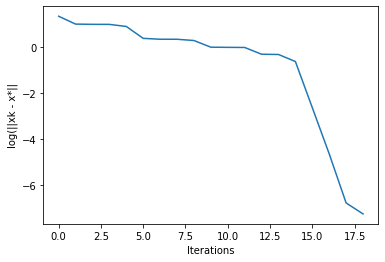

In [24]:
pl = []
for i in range(k+1):
  pl.append(np.log10(np.linalg.norm(np.subtract(xl[i],x))))

kl = range(0,k+1)

plt.plot(kl,pl)
plt.xlabel('Iterations')
plt.ylabel('log(||xk - x*||')
plt.show();

<ipython-input-25-2167987b3c08>:3: RuntimeWarning: divide by zero encountered in log10
  fl.append(np.log10(abs(evalf(xl[i])-f)))


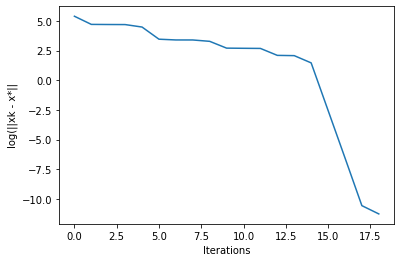

In [25]:
fl = []
for i in range(k+1):
  fl.append(np.log10(abs(evalf(xl[i])-f)))

kl = range(0,k+1)

plt.plot(kl,fl)
plt.xlabel('Iterations')
plt.ylabel('log(||xk - x*||')
plt.show();

In [26]:
# checking for convergence 
c = []
for i in range(18):
  c.append(np.linalg.norm(xl[i+1]-x)/np.linalg.norm(xl[i]-x))
print(c)
c = []
for i in range(18):
  c.append(np.linalg.norm(np.subtract(evalf(xl[i+1]),evalf(x)))/np.linalg.norm(np.subtract(evalf(xl[i]),evalf(x))))
print(c)

[0.45649189439290766, 0.9780273110341522, 0.9940617476331386, 0.8129392449819628, 0.3053304071467721, 0.9157550215208069, 0.9981344954530627, 0.8818700408823174, 0.5139648990204043, 0.9840587887786798, 0.9882058435452076, 0.5094680562249758, 0.9746192913865829, 0.4956276758014938, 0.009999747516033412, 0.009974751881115412, 0.007468797313529387, 0.3355481754072932]
[0.205786543256553, 0.9770711427263413, 0.9876657249193361, 0.6193799092307064, 0.09460408419868212, 0.8639922209406435, 0.9959329752013849, 0.7681355605580875, 0.267242279884459, 0.969062203207443, 0.9755241893314478, 0.25963564671037137, 0.9499261074930849, 0.24564700218220661, 9.99999999075611e-05, 9.999935223062884e-05, 9.342850003802322e-05, 0.20084566596194503]


Looking at the definitions of convergence of sequences . 
* We can see for x values the difference can be bounded by value between 0 to 1 so the type of convergence here is Q-Linear and r is 0.999999999999999999999
* we can see for function values at x we can find a sub sequence which is converging to zero while the remaining sequence is staying approx 0.2
so the sequece can be bounded and type of convergence is Q-Linear

###Q4

* Newton Method took 5 iterations to obtain Minimum value while BFGS took 19 iterations to obatian the Minimum value
* The minimum value from both the methods is same which 505.647

The minimizer using both the methods
 * For newtons method 
   * [-1.04982253]
   * [ 2.95189743]
   * [-3.34298192]
   * [ 4.60956007]
   * [-5.71176195]
   * [ 6.89877618]
   * [-7.62879358]
   * [ 8.16821112]
   * [-9.22221199]
   * [10.05669293]

 * For BFGS method 
  * [-1.04982252]
  * [ 2.95189743]
  * [-3.3429819 ]
  * [ 4.60956007]
  * [-5.71176193]
  * [ 6.89877615]
  * [-7.62879356]
  * [ 8.16821109]
  * [-9.22221197]
  * [10.05669292]

* We can see from the above that the minimzer values are almost same 

Time taken 
 * For newtons method : 0.007817982000233314
 * For BFGS method : 0.019607246000305167

 As we can wee that even though time taken was not huge  but amount of time taken by BFGS is almost 3 times the newtons method 

 So for this problem we can say that Newtons Method(backtracking line search) is Better than the BFGS
